In [14]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [15]:
def convolve2d(image, kernel):
    """
    Apply a 2D convolution operation to an image using a given kernel.
    
    Args:
        image (np.ndarray): Input image array
        kernel (np.ndarray): Convolution kernel
        
    Returns:
        np.ndarray: Convolved image
    """
    # Get the dimensions of the input image and the kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Calculate padding to ensure the output image has the same dimensions as the input
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # Pad the image with reflection padding instead of zeros for better edge handling
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='reflect')
    
    # Initialize the output image
    output = np.zeros_like(image, dtype=np.float32)  # Use float32 for intermediate calculations
    
    # Perform the convolution operation
    for i in range(image_height):
        for j in range(image_width):
            # Extract the region of interest from the padded image
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            # Compute the element-wise multiplication and sum the result
            output[i, j] = np.sum(region * kernel)
    
    return output

In [16]:
def sharpen_image(image, strength=1.0):
    """
    Sharpen an image using a Laplacian kernel.
    
    Args:
        image (np.ndarray): Input image array
        strength (float): Sharpening strength multiplier
        
    Returns:
        np.ndarray: Sharpened image
    """
    # Laplacian kernel for sharpening
    sharpen_kernel = np.array([[-1, -1, -1],
                             [-1,  9, -1],
                             [-1, -1, -1]]) * strength
    
    # Apply the convolution
    sharpened = convolve2d(image, sharpen_kernel)
    
    # Normalize the output to [0, 255] range
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)
    
    return sharpened

In [19]:
def process_and_display(image_path, strength=1.0):
    """
    Load, process, and display the original and sharpened images.
    
    Args:
        image_path (str): Path to the input image
        strength (float): Sharpening strength multiplier
    """
    # Load the image in grayscale
    try:
        img = Image.open(image_path).convert('L')
    except Exception as e:
        print(f"Error loading image: {e}")
        return
    
    # Convert to numpy array
    img_np = np.array(img)
    
    # Apply sharpening
    sharpened_img = sharpen_image(img_np, strength)
    
    # Plot the results
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    axes[0].imshow(img_np, cmap='gray')
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    axes[1].imshow(sharpened_img, cmap='gray')
    axes[1].set_title(f'Sharpened Image (strength={strength})')
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()

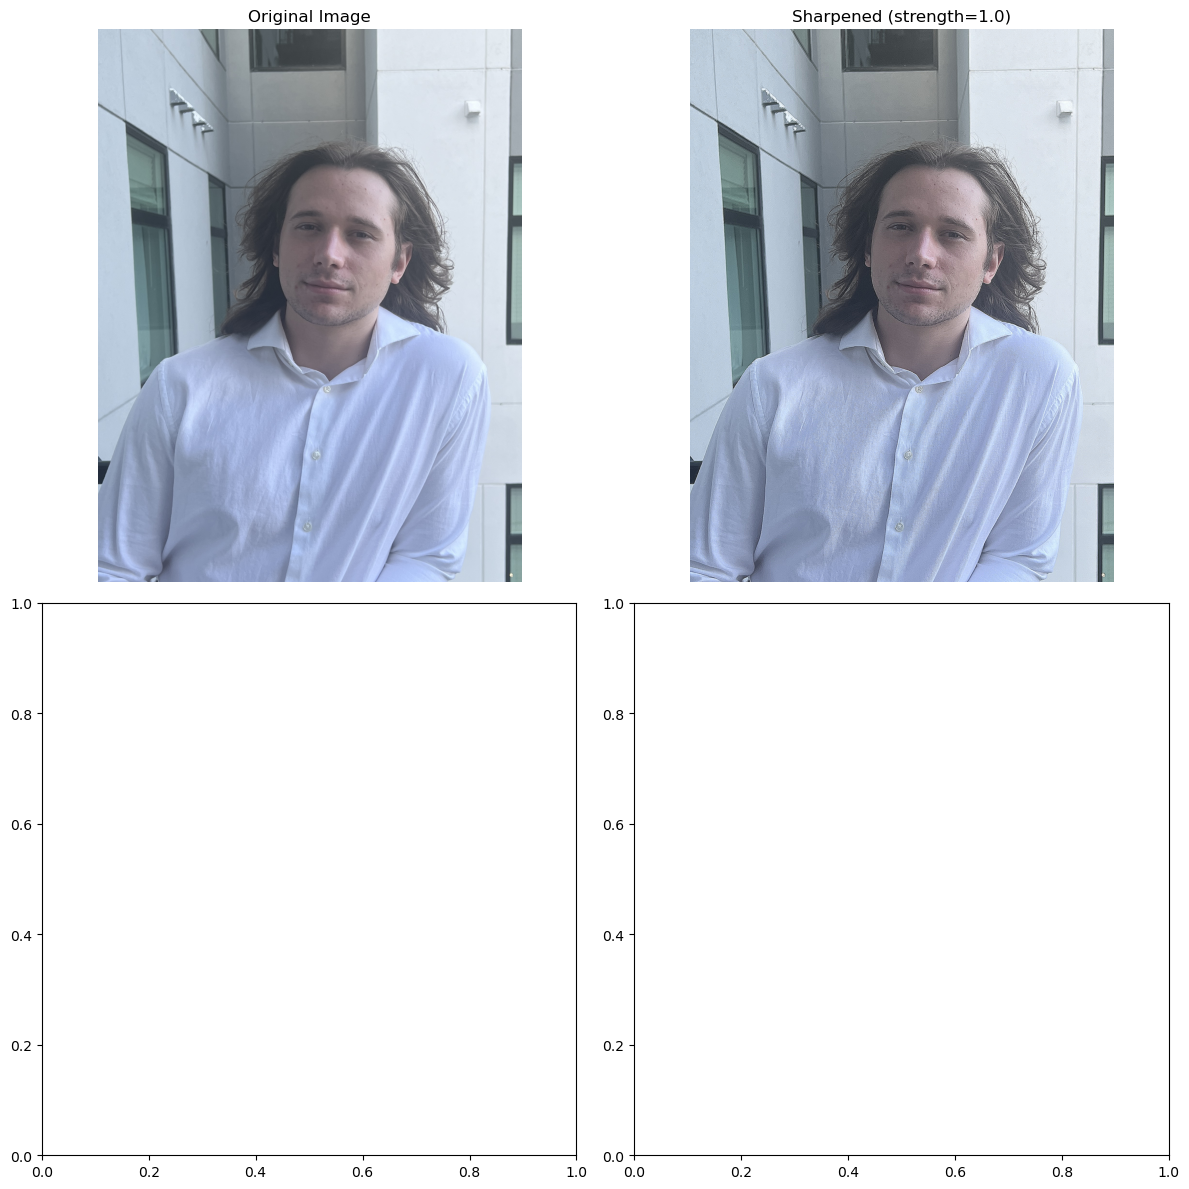

In [24]:
# Example usage
process_and_display('img/prof_pic.jpg', strength=1.0)

In [23]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def convolve2d(image, kernel):
    """
    Apply a 2D convolution operation to an image using a given kernel.
    Supports both grayscale and color images.
    
    Args:
        image (np.ndarray): Input image array (2D for grayscale, 3D for color)
        kernel (np.ndarray): Convolution kernel (2D)
        
    Returns:
        np.ndarray: Convolved image
    """
    # Handle both color and grayscale images
    if len(image.shape) == 3:
        image_height, image_width, channels = image.shape
    else:
        image_height, image_width = image.shape
        channels = 1
        image = image[..., np.newaxis]
    
    kernel_height, kernel_width = kernel.shape
    
    # Calculate padding
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # Initialize output array
    output = np.zeros_like(image, dtype=np.float32)
    
    # Process each channel separately
    for c in range(channels):
        # Pad the current channel
        padded_channel = np.pad(
            image[..., c],
            ((pad_height, pad_height), (pad_width, pad_width)),
            mode='reflect'
        )
        
        # Perform convolution for the current channel
        for i in range(image_height):
            for j in range(image_width):
                region = padded_channel[i:i + kernel_height, j:j + kernel_width]
                output[i, j, c] = np.sum(region * kernel)
    
    # Return 2D array for grayscale images
    return output.squeeze()

def sharpen_image(image, strength=1.0):
    """
    Sharpen an image using a Laplacian kernel.
    Supports both color and grayscale images.
    
    Args:
        image (np.ndarray): Input image array
        strength (float): Sharpening strength multiplier
        
    Returns:
        np.ndarray: Sharpened image
    """
    # Laplacian kernel for sharpening
    sharpen_kernel = np.array([[-1, -1, -1],
                             [-1,  9, -1],
                             [-1, -1, -1]]) * strength
    
    # Apply convolution
    sharpened = convolve2d(image, sharpen_kernel)
    
    # Normalize the output to [0, 255] range
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)
    
    return sharpened

def process_and_display(image_path, strength=1.0, blur_sigma=1.0):
    """
    Load, process, and display the original and processed images.
    Supports both color and grayscale images.
    
    Args:
        image_path (str): Path to the input image
        strength (float): Sharpening strength multiplier
        blur_sigma (float): Gaussian blur sigma value
    """
    try:
        # Load the image in original format (color or grayscale)
        img = Image.open(image_path)
        img_np = np.array(img)
        
        # Apply processing
        sharpened_img = sharpen_image(img_np, strength)
        
        # Plot the results
        fig, axes = plt.subplots(2, 2, figsize=(12, 12))
        
        # Helper function to handle both color and grayscale images
        def show_image(ax, img, title):
            if len(img.shape) == 3:
                ax.imshow(img)
            else:
                ax.imshow(img, cmap='gray')
            ax.set_title(title)
            ax.axis('off')
        
        show_image(axes[0, 0], img_np, 'Original Image')
        show_image(axes[0, 1], sharpened_img, f'Sharpened (strength={strength})')
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Error processing image: {e}")